In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

%load_ext autoreload
%autoreload 2
import lusee

# Gaussian Beam

In [4]:
center_dec=20
sigma_deg=20
gauss_beam=lusee.BeamGauss(dec_deg=center_dec,sigma_deg=sigma_deg)

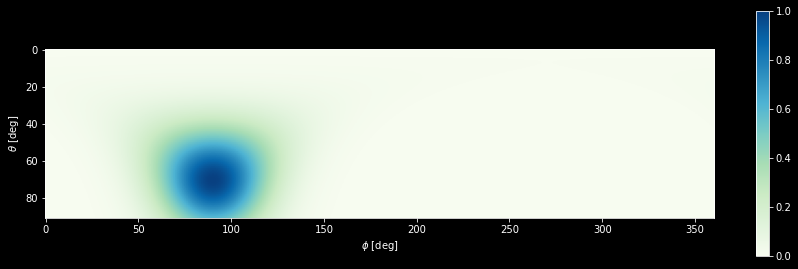

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(np.real(gauss_beam.Etheta[0,:,:]),cmap='GnBu')
plt.ylabel(r'$\theta$ [deg]')
plt.xlabel(r'$\phi$ [deg]')
plt.colorbar(shrink=0.3);

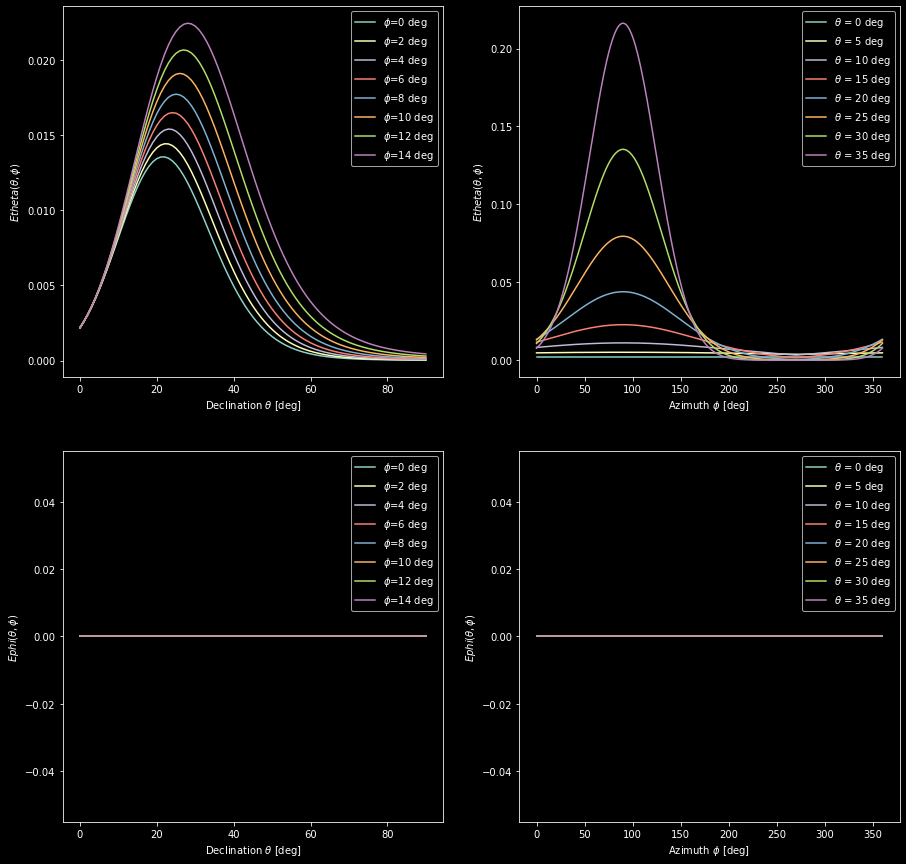

In [6]:
fig,axs=plt.subplots(figsize=(15,15), nrows=2, ncols=2)

for phi in np.arange(0,15,2):
    axs[0,0].plot(gauss_beam.theta_deg,np.real(gauss_beam.Etheta[0,:,phi]), label=f'$\phi$={phi} deg')
    axs[0,0].set_ylabel(r'$Etheta (\theta, \phi)$')
    axs[0,0].set_xlabel(r'Declination $\theta$ [deg]')
    axs[0,0].legend()
    
    axs[1,0].plot(gauss_beam.theta_deg,np.real(gauss_beam.Ephi[0,:,phi]), label=f'$\phi$={phi} deg')
    axs[1,0].set_ylabel(r'$Ephi (\theta, \phi)$')
    axs[1,0].set_xlabel(r'Declination $\theta$ [deg]')
    axs[1,0].legend()
    
for theta in np.arange(0,40,5):
    axs[0,1].plot(gauss_beam.phi_deg,np.real(gauss_beam.Etheta[0,theta,:]), label=f'$\\theta$ = {theta} deg')
    axs[0,1].set_ylabel(r'$Etheta (\theta, \phi)$')
    axs[0,1].set_xlabel(r'Azimuth $\phi$ [deg]')
    axs[0,1].legend()
    
    axs[1,1].plot(gauss_beam.phi_deg,np.real(gauss_beam.Ephi[0,theta,:]), label=f'$\\theta$ = {theta} deg')
    axs[1,1].set_ylabel(r'$Ephi (\theta, \phi)$')
    axs[1,1].set_xlabel(r'Azimuth $\phi$ [deg]')
    axs[1,1].legend()


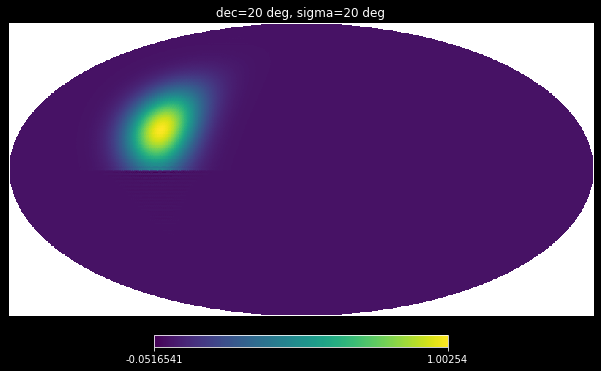

In [7]:
lmax=200
nside=128
hp.mollview(gauss_beam.power_hp(ellmax=lmax,Nside=nside,freq_ndx=0), title=f"dec={center_dec} deg, sigma={sigma_deg} deg")

# Ground Fraction

In [8]:
gain_conv=np.ones(gauss_beam.Nfreq)

dphi=gauss_beam.phi[1]-gauss_beam.phi[0]
dtheta=gauss_beam.theta[1]-gauss_beam.theta[0]
dA_theta=np.sin(gauss_beam.theta)*dtheta*dphi

factor=(dA_theta[:,None]*gauss_beam.power()[0,:,:]).sum()/(4*np.pi)
gain_conv/=factor

gain_conv

array([35.43418946, 35.43418946, 35.43418946, 35.43418946, 35.43418946,
       35.43418946, 35.43418946, 35.43418946, 35.43418946, 35.43418946,
       35.43418946, 35.43418946, 35.43418946, 35.43418946, 35.43418946,
       35.43418946, 35.43418946, 35.43418946, 35.43418946, 35.43418946,
       35.43418946, 35.43418946, 35.43418946, 35.43418946, 35.43418946,
       35.43418946, 35.43418946, 35.43418946, 35.43418946, 35.43418946,
       35.43418946, 35.43418946, 35.43418946, 35.43418946, 35.43418946,
       35.43418946, 35.43418946, 35.43418946, 35.43418946, 35.43418946,
       35.43418946, 35.43418946, 35.43418946, 35.43418946, 35.43418946,
       35.43418946, 35.43418946, 35.43418946, 35.43418946, 35.43418946])

In [9]:
gain=gauss_beam.power()*gain_conv[:,None,None]

f_sky = np.array([(dA_theta[:,None]*gain[i,:,:]).sum()/(4*np.pi) for i in range(gauss_beam.Nfreq)])
f_sky

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
gauss_beam.ground_fraction()

array([-2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16, -2.22044605e-16])

In [11]:
np.all(np.abs(gauss_beam.ground_fraction())<1e-3)

True